In [41]:
#Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

**Reading Titanic Dataset** 

> Store Data in X_training, Y_training, X_test and Y_test





In [42]:
x_train = pd.read_csv("/content/drive/MyDrive/Dataset Titanic/train_X.csv")
y_train = pd.read_csv("/content/drive/MyDrive/Dataset Titanic/train_Y.csv")
x_test = pd.read_csv("/content/drive/MyDrive/Dataset Titanic/test_X.csv")
y_test = pd.read_csv("/content/drive/MyDrive/Dataset Titanic/test_Y.csv")

# Dropping "Id" coloumn

In [43]:
x_train = x_train.drop("Id", axis=1)
y_train = y_train.drop("Id", axis=1)
x_test = x_test.drop("Id", axis=1)
y_test = y_test.drop("Id", axis=1)

## Filling Missing Data with mean of that coloumn

In [44]:
x_test["Age"] = x_test["Age"].fillna(np.mean(x_test["Age"]))

In [45]:
x_test["Fare"] = x_test["Fare"].fillna(np.mean(x_test["Fare"]))

In [46]:
x_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [47]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,1
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,1
4,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,1
414,1,1,39.00000,0,0,108.9000,0
415,3,0,38.50000,0,0,7.2500,1
416,3,0,30.27259,0,0,8.0500,1


# Scaling Data 

In [48]:
x_train = preprocessing.scale(x_train)
x_test = preprocessing.scale(x_test)

In [49]:
x_train

array([[ 0.82737724, -0.73769513, -0.5669478 , ..., -0.47367361,
        -0.50244517,  0.20225613],
       [-1.56610693,  1.35557354,  0.6375534 , ..., -0.47367361,
         0.78684529, -1.7354881 ],
       [ 0.82737724,  1.35557354, -0.2658225 , ..., -0.47367361,
        -0.48885426,  0.20225613],
       ...,
       [ 0.82737724,  1.35557354, -0.71751045, ...,  2.00893337,
        -0.17626324,  0.20225613],
       [-1.56610693, -0.73769513, -0.2658225 , ..., -0.47367361,
        -0.04438104, -1.7354881 ],
       [ 0.82737724, -0.73769513,  0.18586545, ..., -0.47367361,
        -0.49237783,  2.14000037]])

### Converting Series to numpy array

In [50]:
y_train = y_train.values
y_test = y_test.values

### Reshaping Dataset

In [51]:
x_train = x_train.T
y_train = y_train.reshape(1, -1)

x_test = x_test.T
y_test = y_test.reshape(1, -1)

### Displaying Dataset Shape

In [52]:
print(f"Shape of x_train is: {x_train.shape}")
print(f"Shape of y_train is: {y_train.shape}")
print(f"Shape of x_test is: {x_test.shape}")
print(f"Shape of y_test is: {y_test.shape}")

Shape of x_train is: (7, 891)
Shape of y_train is: (1, 891)
Shape of x_test is: (7, 418)
Shape of y_test is: (1, 418)


Defining Function for initializig Parameters (w, b)

In [53]:
def initialize_with_zeros(dim):
  w = np.zeros((dim, 1))
  b = float(0)

  return w, b

### Sigmoid Function

In [54]:
def sigmoid(z):

  s = 1 / (1 + np.exp(-z))

  return s 


## Defining function for Forward and Backward Propagation
### In forward propagation we calculate cost
### and In backward propagation we calculate derivatives

In [55]:
def propagate(w, b, X, Y):

  m = X.shape[1]

  Z = np.dot(w.T, X) + b
  A = sigmoid(Z)

  cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))

  dw = (1/m) * np.dot(X, (A-Y).T) 
  db = (1/m) * np.sum(A-Y)

  grads = {
      "dw": dw,
      "db": db
  } 
  cost = np.squeeze(np.array(cost)) 

  return grads, cost

### Optimizing the model to learn the parameters or Apply Gradient Descent

In [56]:
def optimize(w, b, X, Y, learning_rate, iterations, print_cost=False):

  cost_list = []
  
  for i in range(iterations):

    grads, cost = propagate(w, b, X, Y)

    dw = grads["dw"]
    db = grads["db"]

    w = w - (learning_rate * dw)
    b = b - (learning_rate * db)

    if i % 100 == 0:
      cost_list.append(cost)

      if print_cost:
        print(f"Cost After {i} iterations is: {cost}")

  params = {
        "w": w,
        "b": b
    }

  grads = {
        "dw": dw,
        "db": db
    }
  
  return params, grads, cost_list

### Defining Function for Prediction

In [57]:
def predict(w, b, X):

  m = X.shape[1]
  y_prediction = np.zeros((1, m))
  w = w.reshape(X.shape[0], 1)

  A = sigmoid(np.dot(w.T, X) + b)
  
  for i in range(A.shape[1]):
    if A[0, i] > 0.5:
      y_prediction[0, i] = 1
    else:
      y_prediction[0, i] = 0

  return y_prediction

## Defining the Model 


In [58]:
def model(X, Y, xT, yT, learning_rate, iterations, print_cost=False):

  w, b = initialize_with_zeros(X.shape[0])
  params, grads, cost_list = optimize(w, b, X, Y, learning_rate, iterations, print_cost=True)

  w = params["w"]
  b = params["b"]

  y_prediction_X = predict(w, b, X)
  y_prediction_xT = predict(w, b, xT)

  if print_cost:
    print(f"Accuracy of Train Data is: {100 - np.mean(np.abs(y_prediction_X - Y) * 100)}")
    print(f"Accuracy of Test Data is: {100 - np.mean(np.abs(y_prediction_xT - yT) * 100)}")

  d = {
      "w": w,
       "b": b,
       "y_prediction_X": y_prediction_X,
       "y_prediction_xT": y_prediction_xT,
       "learning_rate": learning_rate,
       "iterations": iterations,
       "cost_list": cost_list
  }

  return d

In [59]:
logistic_regression = model(X=x_train, Y=y_train, xT=x_test, yT=y_test, learning_rate=0.005, iterations=2000, print_cost=True)

Cost After 0 iterations is: 0.6931471805599454
Cost After 100 iterations is: 0.6373420777718123
Cost After 200 iterations is: 0.5976772305946954
Cost After 300 iterations is: 0.5686545599728919
Cost After 400 iterations is: 0.5468269185202228
Cost After 500 iterations is: 0.5300133832979685
Cost After 600 iterations is: 0.5167964644083037
Cost After 700 iterations is: 0.5062265658568098
Cost After 800 iterations is: 0.4976489031351306
Cost After 900 iterations is: 0.4906000084944349
Cost After 1000 iterations is: 0.4847441156412562
Cost After 1100 iterations is: 0.4798329294479908
Cost After 1200 iterations is: 0.4756794838850439
Cost After 1300 iterations is: 0.47214072190260964
Cost After 1400 iterations is: 0.4691056175365122
Cost After 1500 iterations is: 0.4664869063427547
Cost After 1600 iterations is: 0.4642152182762457
Cost After 1700 iterations is: 0.4622348432899041
Cost After 1800 iterations is: 0.4605006275496269
Cost After 1900 iterations is: 0.4589756660992692
Accuracy of

### Plotting Values of Cost

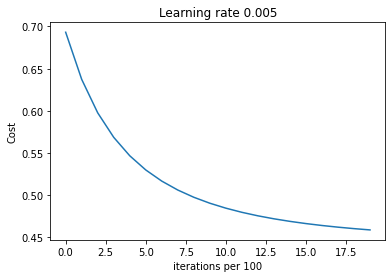

In [60]:
costs = np.squeeze(logistic_regression["cost_list"])
plt.plot(costs)
plt.xlabel("iterations per 100")
plt.ylabel("Cost")
plt.title(f'Learning rate {logistic_regression["learning_rate"]}')
plt.show()
